In [6]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import re

import glob
import os.path

# import sys
# from paths import Paths
# paths = Paths()
# sys.path.append(paths.scripts_root)
# import util

#import imutils

%load_ext autoreload
%autoreload 2

# Display entire width of browser
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

#paths.print_paths()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
folder_root = "/Users/trafferty/tmp/extrusion_images"
dark_root   = "%s/RawImages_Dark" % (folder_root)
bright_root = "%s/RawImages_Bright" % (folder_root)

DF_glob_filespec = "%s/*.raw" % (dark_root)
BF_glob_filespec = "%s/*.raw" % (bright_root)

DF_paths = glob.glob(DF_glob_filespec)
DF_files = [os.path.basename(path) for path in DF_paths ]
BF_paths = glob.glob(BF_glob_filespec)
BF_files = [os.path.basename(path) for path in BF_paths ]

f=6
regex = r"B1-IP_OAS-[0-9_+]*-w1-p1-sna-f%d-1r0-[0-9r]*-2048x1088.raw" % (f)

dark_path = ''
bright_path = ''

for DF_path in DF_paths:
    DF_match = re.search(regex, DF_path)
    if DF_match:
        for BF_path in BF_paths:
            BF_match = re.search(regex, BF_path)
            if BF_match:
                dark_path = DF_path 
                bright_path = BF_path
print("Darkfield file:  " , os.path.basename(dark_path))
print("Brightfield file: " , os.path.basename(bright_path))


# test_str = ("/Users/trafferty/tmp/extrusion_images/RawImages_Bright/B1-IP_OAS-20171018_133859_692794+0900-w1-p1-sna-f3-1r0-2r59918-2048x1088.raw\n"
# 	"/Users/trafferty/tmp/extrusion_images/RawImages_Bright/B1-IP_OAS-20171018_133900_749332+0900-w1-p1-sna-f6-1r0-2r59954-2048x1088.raw\n"
# 	"/Users/trafferty/tmp/extrusion_images/RawImages_Bright/B1-IP_OAS-20171018_133905_437590+0900-w1-p1-sna-f18-1r0-2r60098-2048x1088.raw\n"
# 	"/Users/trafferty/tmp/extrusion_images/RawImages_Bright/B1-IP_OAS-20171018_133901_449037+0900-w1-p1-sna-f1-1r0-2r59978-2048x1088.raw")

# matches = re.finditer(regex, test_str, re.MULTILINE)

# for matchNum, match in enumerate(matches):
#     matchNum = matchNum + 1
    
#     print ("Match {matchNum} was found at {start}-{end}: {match}".format(matchNum = matchNum, start = match.start(), end = match.end(), match = match.group()))


B1-IP_OAS-20171018_133900_749332+0900-w1-p1-sna-f6-1r0-2r59954-2048x1088.raw
B1-IP_OAS-20171018_134219_142544+0900-w1-p1-sna-f6-1r0-2r62645-2048x1088.raw
B1-IP_OAS-20171018_133900_749332+0900-w1-p1-sna-f6-1r0-2r59954-2048x1088.raw
---------------------------------


### Read in the RAW images of dark and bright field

/Users/trafferty/tmp/extrusion_images/00403858_180514_SFC_DeviceZ_Dark/-58_-15725/Field_4_-58_-15725.raw
/Users/trafferty/tmp/extrusion_images/00403840_180514_SFC_DeviceZ_Bright/-58_-15725/Field_4_-58_-15725.raw


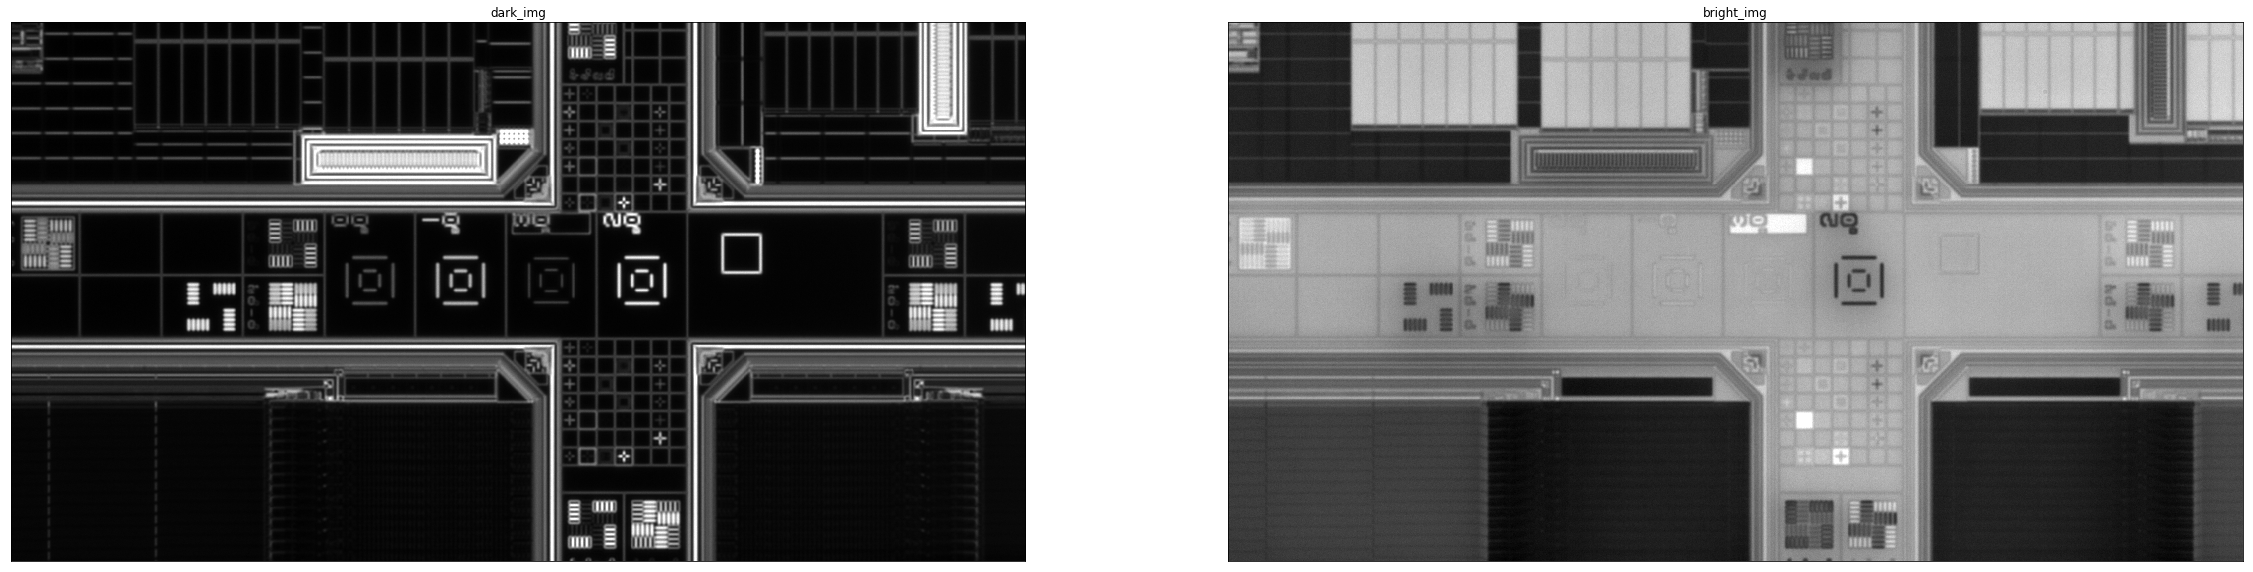

In [3]:
dark_root   = "%s/%s" % (dark_root, )
bright_root = paths.tmp_dir+'/extrusion_images/00403840_180514_SFC_DeviceZ_Bright'

loc = '-58_-15725'
field = '4'

dark_img_path = "%s/%s/Field_%s_%s.raw" % (dark_root, loc, field, loc)
bright_img_path = "%s/%s/Field_%s_%s.raw" % (bright_root, loc, field, loc)
print(dark_img_path)
print(bright_img_path)

raw_rows = 1088
raw_cols = 2048
dark_img = util.readRaw(dark_img_path, raw_rows, raw_cols)
bright_img = util.readRaw(bright_img_path, raw_rows, raw_cols)

util.plot_imgs([(dark_img,'dark_img'), (bright_img,'bright_img')], max_cols = 2, fig_size = 20)

#/Users/trafferty/tmp/extrusion_images/00403858_180514_SFC_DeviceZ_Dark/-58_-15725/Field_4_-58_-15725.raw

In [4]:
import glob
import os.path

DF_glob_filespec = "%s/*/*.raw" % (dark_root)
BF_glob_filespec = "%s/*/*.raw" % (bright_root)

DF_paths = glob.glob(DF_glob_filespec)
DF_files = [os.path.basename(path) for path in DF_paths ]

BF_paths = glob.glob(BF_glob_filespec)
BF_files = [os.path.basename(path) for path in BF_paths ]

# print(DF_files)
# print("-------------------------")
# print(BF_files)
# print("-------------------------")

file_set = set(DF_files).intersection(BF_files)
# print(file_set)

file_sets = []
for DF_path in DF_paths:
    DF_file = os.path.basename(DF_path)
    for BF_path in BF_paths:
        BF_file = os.path.basename(BF_path)
        if DF_file == BF_file:
            file_sets.append( (DF_path, BF_path) )
    

for file_set in file_sets:
    print(os.path.basename(file_set[0]))
    print(os.path.basename(file_set[1]))
    print("---------------------------------")

Field_4_-5408_15725.raw
Field_4_-5408_15725.raw
---------------------------------
Field_4_-12198_-15725.raw
Field_4_-12198_-15725.raw
---------------------------------
Field_4_-58_-15725.raw
Field_4_-58_-15725.raw
---------------------------------
Field_4_12175_-7503.raw
Field_4_12175_-7503.raw
---------------------------------
Field_4_12175_15725.raw
Field_4_12175_15725.raw
---------------------------------
Field_4_-12175_93.raw
Field_4_-12175_93.raw
---------------------------------
Field_4_6268_15725.raw
Field_4_6268_15725.raw
---------------------------------
Field_4_-5408_-15725.raw
Field_4_-5408_-15725.raw
---------------------------------
Field_4_12198_-15725.raw
Field_4_12198_-15725.raw
---------------------------------
Field_4_-58_15725.raw
Field_4_-58_15725.raw
---------------------------------
Field_4_-12175_15725.raw
Field_4_-12175_15725.raw
---------------------------------
Field_4_-12175_8775.raw
Field_4_-12175_8775.raw
---------------------------------
Field_4_12175_93.r

(16384, 2176, 3)


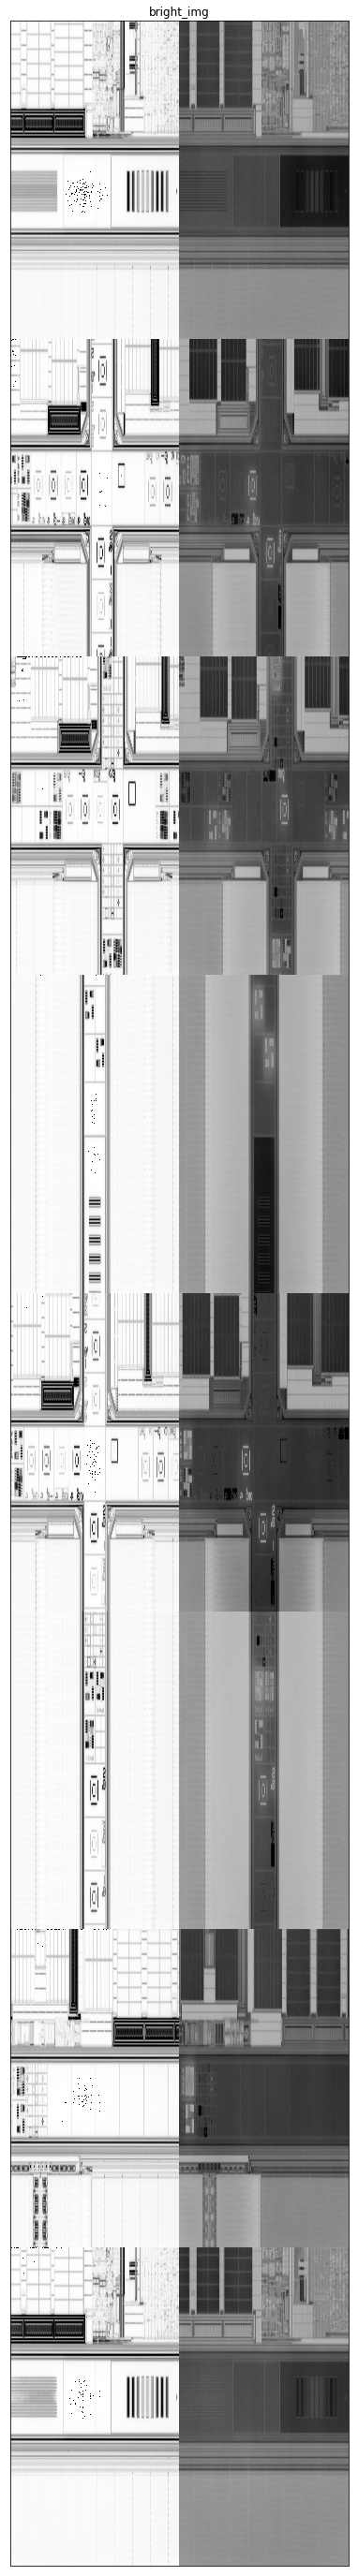

In [30]:
images = []

raw_rows = 1088
raw_cols = 2048

for file_set in file_sets:
    name = os.path.basename(file_set[0])
    dark_img = util.readRaw(file_set[0], raw_rows, raw_cols)
    dark_img = cv2.cvtColor(dark_img, cv2.COLOR_GRAY2BGR)
    images.append( dark_img )
    bright_img = util.readRaw(file_set[1], raw_rows, raw_cols)
    bright_img = cv2.cvtColor(bright_img, cv2.COLOR_GRAY2BGR)
    images.append( bright_img )


    
montage = imutils.build_montages(images, (1088, 2048), (2, 8))
# plt.figure(200)
# plt.imshow(montage[0])
util.plot_imgs([(montage[0],'bright_img')], max_cols = 2, fig_size = 50)

print(montage[0].shape)

#cv2.imshow("Montage", montage[0])


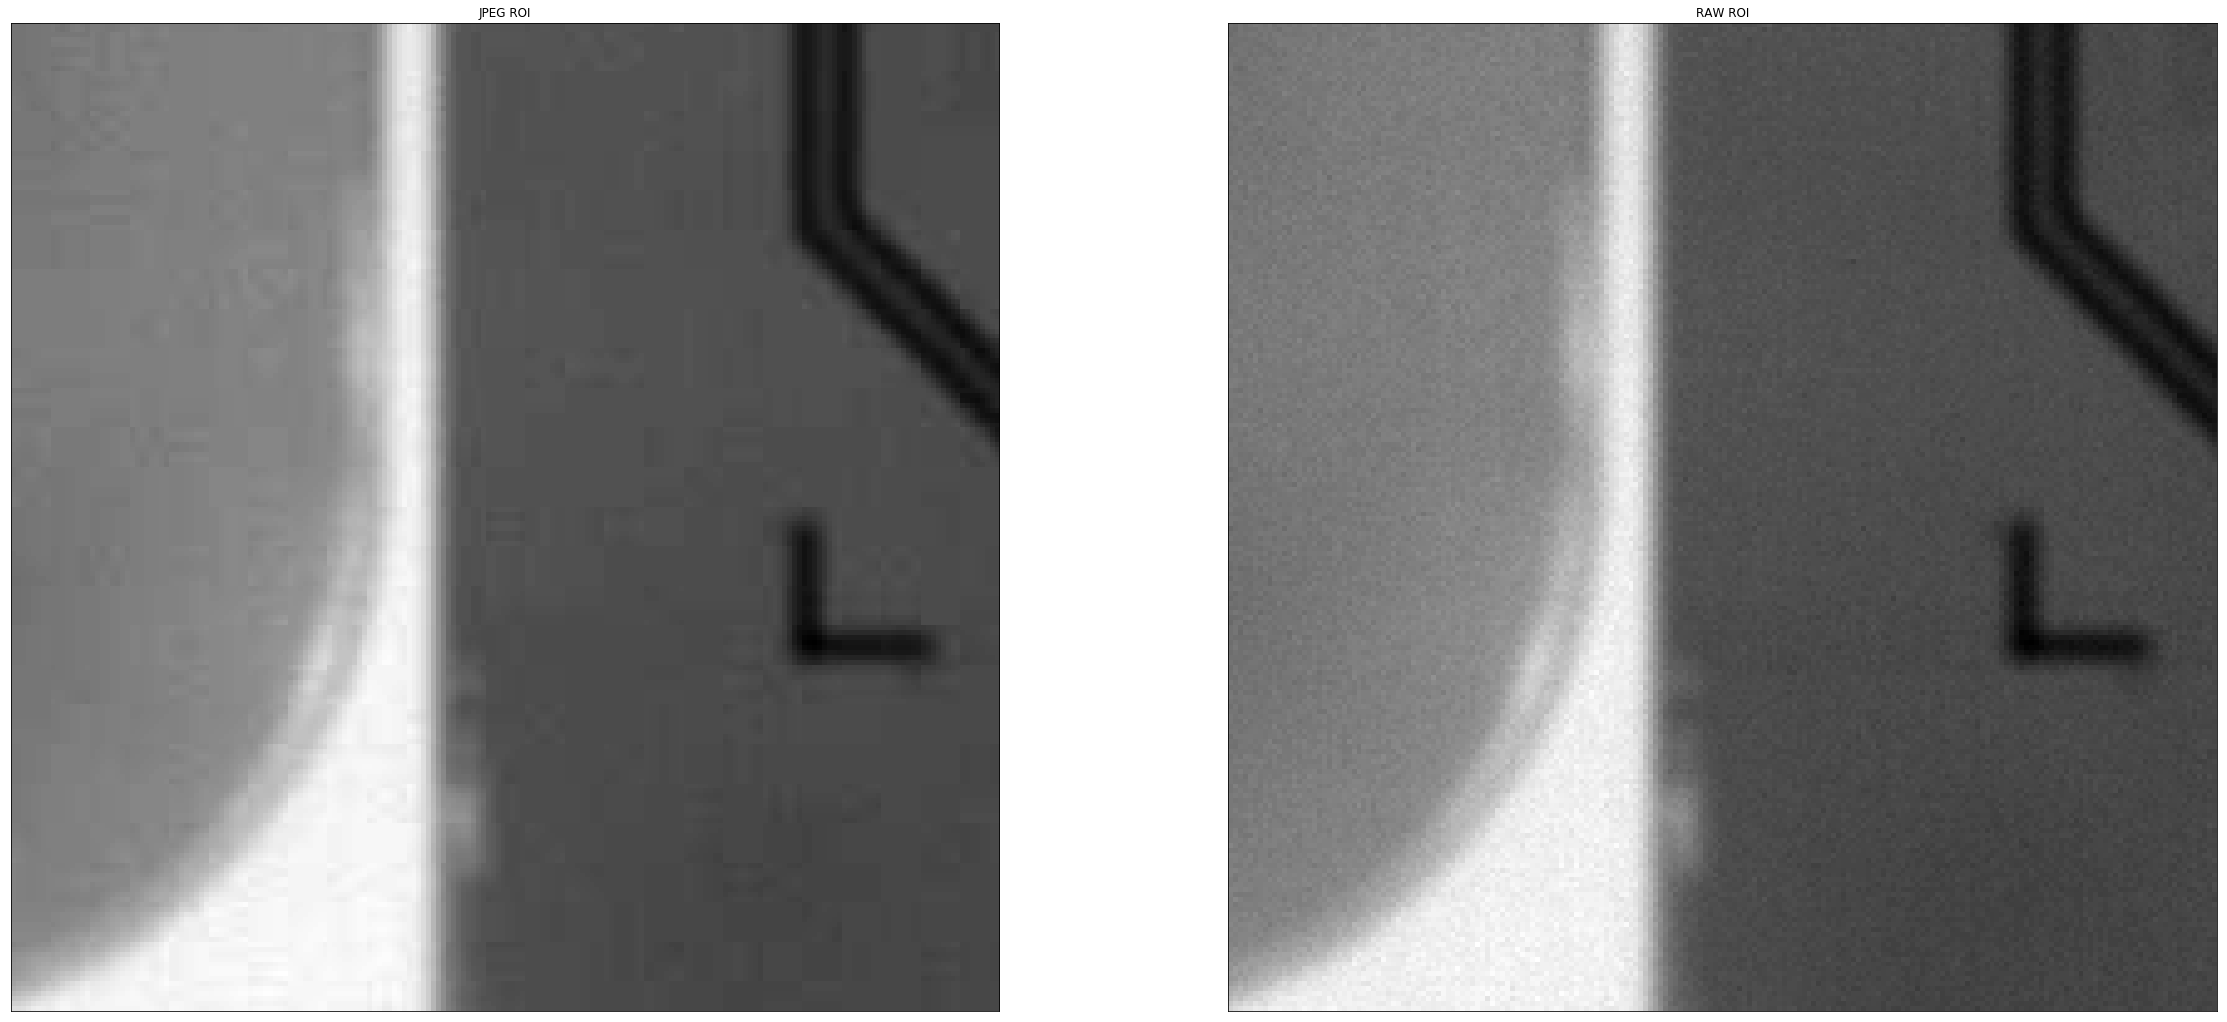

In [32]:
rows, cols = jpg.shape
midX, midY = int(cols/2), int(rows/2)

width = 200
offsetX = 100
offsetY = -150
Y = midY+offsetY
X = midX+offsetX
startY = int(Y - (width/2))
endY   = int(Y + (width/2))
startX = int(X - (width/2))
endX   = int(X + (width/2))

jpg_roi = jpg[startY:endY, startX:endX]
raw_roi = raw[startY:endY, startX:endX]

util.plot_imgs([(jpg_roi,'JPEG ROI'), (raw_roi,'RAW ROI')], max_cols = 2, fig_size = 20)

Delta value: 9


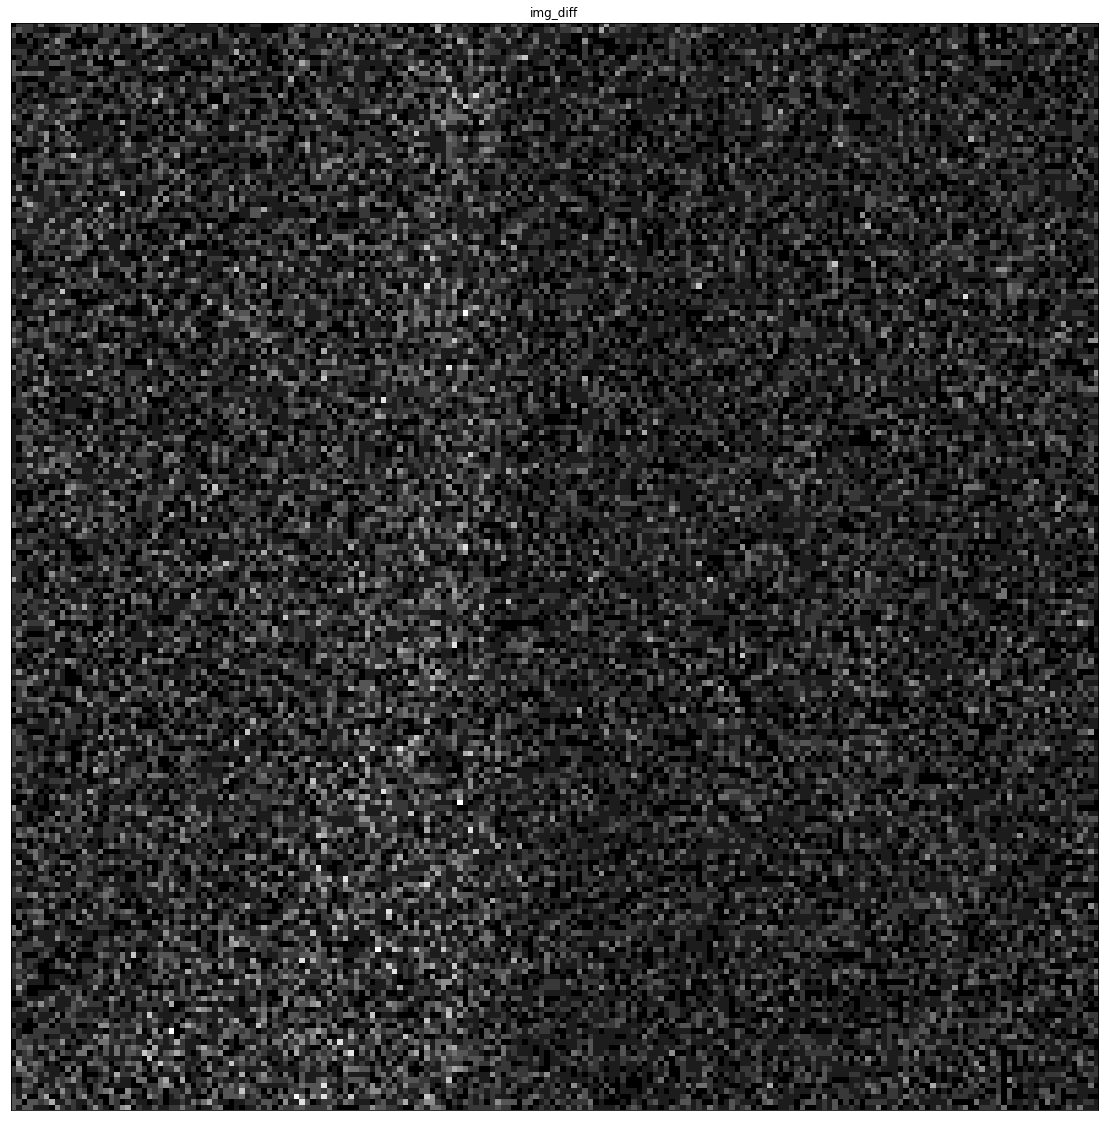

In [35]:
img_diff = cv2.absdiff(jpg_roi, raw_roi)

delta_value = img_diff.max() - img_diff.min()
print("Delta value: %d" % delta_value)

util.plot_imgs([(img_diff,'img_diff')], max_cols = 2, fig_size = 20)